# Data exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas rtree &> /dev/null # install necessary packages 

import geopandas as gpd
import pandas as pd
import rtree
import os
import pickle
import matplotlib.pyplot as plt

print(os.getcwd())
os.chdir('/content/drive/MyDrive/shared/ssc22-case-comp/dataset/')

Mounted at /content/drive
/content


In [ ]:
# 0. Load the original data
with open('./python_canada-speed-data.p', 'rb') as file: 
    data = pickle.load(file) 
print('load complete')

load complete


In [ ]:
print(data.shape)
print(data.columns)
data.head(5)
# data.plot()

(2751464, 21)
Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME',
       'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS',
       'geometry'],
      dtype='object')


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0023331133131332,11910,1408,27,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4593360.869 4089469.904, 4593533.055..."
1,0023331133133011,14969,1554,25,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4592705.709 4089714.238, 4592877.874..."
2,0032202103303220,5038,1317,54,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010054,8,330.0,None,None,None,None,"POLYGON ((4736491.486 4146142.702, 4736658.777..."
3,0032220031120102,13419,6169,50,4,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,None,None,None,None,"POLYGON ((4642710.684 4070147.116, 4642884.538..."
4,0032220031120103,13587,1095,28,2,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,0388,Inuvik,4,2,"POLYGON ((4642884.538 4070012.633, 4643058.404..."


In [ ]:
# census subdivisions == Municipalities. Categorized by CSDUID, CSDNAME

muni = gpd.read_file('./boundaries/statcan-census-subdivision/')
print(muni.shape)
muni.head(5)

(5139, 9)


,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CSDUID,CSDNAME,CSDTYPE,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001101,"Division No. 1, Subd. V",SNO,"POLYGON ((8995736.731 2075206.900, 8995773.829..."
1,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001105,Portugal Cove South,T,"POLYGON ((9001504.369 2049856.597, 9001184.977..."
2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001113,Trepassey,T,"POLYGON ((8992311.551 2054468.074, 8994001.626..."
3,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001120,St. Shott's,T,"POLYGON ((8984643.846 2028226.374, 8984517.954..."
4,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001124,"Division No. 1, Subd. U",SNO,"POLYGON ((8999438.940 2119599.860, 9000390.637..."


In [ ]:
# match the crs (coordinate reference system)

muni = muni.to_crs(4326)
data = data.to_crs(4326)
muni.crs == data.crs

True

In [ ]:
csd_dict = {'canada':data, 'csd':muni}

# save the CSD data 
csd_path = './boundaries/statcan-census-subdivision/python_csd_data.p'
with open(csd_path, 'wb') as file:
    pickle.dump(csd_dict, file)


In [ ]:
# Perform spatial join using .sjoin() to group the original data by the census subdivision.

print(data.shape) # 2751464 rows
print(muni.shape) # 5139 rows

# Therefore, we must have 5139 rows after the join



(2751464, 21)
(5139, 9)


In [ ]:
data['PRNAME'].unique()

array(['Northwest Territories / Territoires du Nord-Ouest', 'Yukon',
       'British Columbia / Colombie-Britannique', 'Alberta',
       'Saskatchewan', 'Manitoba', 'Ontario',
       'Newfoundland and Labrador / Terre-Neuve-et-Labrador',
       'Quebec / Québec', 'New Brunswick / Nouveau-Brunswick',
       'Nova Scotia / Nouvelle-Écosse',
       'Prince Edward Island / Île-du-Prince-Édouard', 'Nunavut'],
      dtype=object)

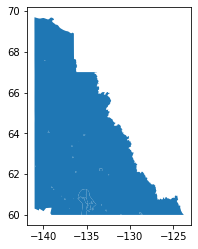

In [ ]:
muni[muni['PRNAME']=='Yukon'].plot()

(9051, 21)
(9757, 30)
Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID_left', 'PRNAME_left',
       'CDUID_left', 'CDNAME_left', 'DAUID', 'SACTYPE', 'DA_POP', 'PCUID',
       'PCNAME', 'PCTYPE', 'PCCLASS', 'geometry', 'index_right', 'PRUID_right',
       'PRNAME_right', 'CDUID_right', 'CDNAME_right', 'CDTYPE', 'CSDUID',
       'CSDNAME', 'CSDTYPE'],
      dtype='object')


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID_left,...,geometry,index_right,PRUID_right,PRNAME_right,CDUID_right,CDNAME_right,CDTYPE,CSDUID,CSDNAME,CSDTYPE
1635,0211322332323210,645,897,29,1,1,2019,Q1,fixed,46,...,"POLYGON ((-98.90991 55.78893, -98.90442 55.788...",2897,46,Manitoba,4622,Division No. 22,CDR,4622059,Nelson House 170,IRI
1636,0211323223323002,29975,30659,11,4,3,2019,Q1,fixed,46,...,"POLYGON ((-97.86621 55.79819, -97.86072 55.798...",2886,46,Manitoba,4622,Division No. 22,CDR,4622017,Mystery Lake,LGD
49028,0213101001102031,39016,27793,15,15,1,2019,Q1,fixed,46,...,"POLYGON ((-97.89368 55.74567, -97.88818 55.745...",2886,46,Manitoba,4622,Division No. 22,CDR,4622017,Mystery Lake,LGD
49039,0213101001102122,14604,1454,18,5,2,2019,Q1,fixed,46,...,"POLYGON ((-97.88818 55.74257, -97.88269 55.742...",2886,46,Manitoba,4622,Division No. 22,CDR,4622017,Mystery Lake,LGD
49045,0213101001102211,161674,282194,15,1,1,2019,Q1,fixed,46,...,"POLYGON ((-97.89368 55.73948, -97.88818 55.739...",2886,46,Manitoba,4622,Division No. 22,CDR,4622017,Mystery Lake,LGD


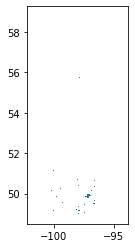

In [ ]:
test = data[(data['PRNAME']=='Manitoba') & (data['year']=='2019') & (data['quarter']=='Q1')]
print(test.shape)

test_merge = gpd.sjoin(test, muni, how='inner', predicate='intersects')
print(test_merge.shape)
print(test_merge.columns)
test_merge['geometry'].plot()
test_merge.head(5)

In [ ]:
muni.columns



Index(['PRUID', 'PRNAME', 'CDUID', 'CDNAME', 'CDTYPE', 'CSDUID', 'CSDNAME',
       'CSDTYPE', 'geometry'],
      dtype='object')

In [ ]:
test_merge.shape

(135, 30)

In [ ]:
merged2 = gpd.sjoin(data, muni, how='inner', predicate='within')
print(merged2.shape)
merged2.head(5)

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

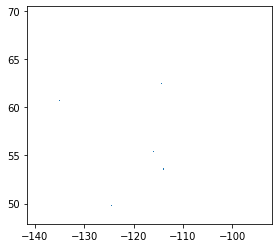

In [ ]:
csd_merged_path = './boundaries/statcan-census-subdivision/csd-merged.p'
with open(csd_merged_path, 'wb') as file:
    pickle.dump(merged1, file)

In [ ]:
merged1.shape
merged1.plot()

In [ ]:
## Split, compute the weighted averages for the speeds, merge with the boundary data, convert the time columns, and rbind.

years = ['2019', '2020', '2021']
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
conn_types = ['fixed', 'mobile']

yqs = []

for y in years:
    for q in quarters:
        yqs.append(y + '-' + q)
yqs

province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
                  'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
                  'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
                  'Nova Scotia', 'Prince Edward Island', 'Nunavut']

                  

In [ ]:
## load the split data
file_path = './' + province_names[3] + '/by_year_quarter/' + province_names[3]+'-'+yqs[0] + '.shp'
p_file_load = gpd.read_file(file_path)

## Extract only conn_type = 'fixed'
p_file_load = p_file_load[p_file_load['conn_type']=='fixed']

## change the download and upload speed's unit to mbps
p_file_load['avg_d_mbps'] = p_file_load['avg_d_kbps'] / 1000
p_file_load['avg_u_mbps'] = p_file_load['avg_u_kbps'] / 1000


## make time column
months = ['03-31', '06-30', '09-30', '12-31']
p_file_load['month'] = p_file_load['quarter'].replace(quarters, months)
p_file_load['time'] = p_file_load['year'] + '-' + p_file_load['month']
p_file_load['time'] = pd.to_datetime(p_file_load['time'])

## drop unused columns
p_file_load = p_file_load[info_cols]
p_file_load = p_file_load.drop(columns = ['year','month','quarter','avg_d_kbps', 'avg_u_kbps', 'DAUID'])

## filter the boundary data accordingly
pruid = str(p_file_load['PRUID'].unique()[0])
b_file_load = muni[muni['PRUID']==pruid]
b_file_load = b_file_load[['CSDUID','CSDNAME', 'CSDTYPE', 'geometry']]
# b_file_load.head(5)

## match the crs
p_file = p_file_load.to_crs(4326)
b_file = b_file_load.to_crs(4326)

## perform .sjoin
temp_merged = gpd.sjoin(p_file, b_file, how='left', predicate='intersects')
print(temp_merged.shape)
temp_merged.head(5)

## compute the weighted average speeds
test1 = w_avg(temp_merged, 'CSDUID', ['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms'])

## Merge the rest of the info to the test1 df
info_cols = ['time','CSDUID', 'CSDNAME', 'CSDTYPE', 'conn_type', 'geometry']
info_df = temp_merged[info_cols]
csd_dat = info_df.merge(test1, how='left', on='CSDUID')
csd_dat.head(5)

KeyError: ignored

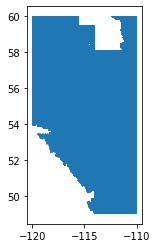

In [ ]:
import matplotlib.pyplot as plt
temp_merged.plot()

# fig, ax = plt.subplots(1,1, figsize=(20,20))

# temp_merged.plot(column='avg_d_mbps', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)

In [ ]:
p_file_load.shape

(23389, 20)

In [ ]:
# Define w_avg()
import numpy as np

def w_avg(df, name_col, val_cols, w_col='tests'):
    """ Computes weighted averages of specified columns"""
    '''
    df: target data frame.
    name_col: String. The grouping column.
    val_cols: list of strings. Names of the columns to average over.
    w_col: String. Name of the column that is used for weighting the averages.
    '''
    
    names = df[name_col].unique() 
    col_list = [name_col, val_cols[0], val_cols[1], val_cols[2], w_col, 'devices', 'DA_POP']
    result_df = pd.DataFrame(columns = col_list)    
    
    for name in names: # for each ID
        # extract a group
        temp_table = df[df[name_col]==name] 
        # compute the weightes averages
        temp_d_avg = np.average(temp_table[val_cols[0]], weights=temp_table[w_col])
        temp_u_avg = np.average(temp_table[val_cols[1]], weights=temp_table[w_col])
        temp_l_avg = np.average(temp_table[val_cols[2]], weights=temp_table[w_col])
        temp_w = np.sum(temp_table[w_col])
        temp_da_pop = np.sum(temp_table['DA_POP'])
        temp_devices = np.sum(temp_table['devices'])
        # add the averages to the result dataframe
        result_df = result_df.append(dict(zip(col_list, [name, temp_d_avg, temp_u_avg, temp_l_avg, temp_w, temp_devices, temp_da_pop])), ignore_index=True)
    return result_df

In [ ]:
test1 = w_avg(temp_merged, 'CSDUID', ['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms'])

print(test1.shape)
print(b_file.shape)
print(len(b_file['CSDUID']))
print(len(b_file['CSDUID'].unique()))

# the difference in the size comes from non-observed subdivisions in our data.

print(test1.head(5))
print(np.sum(test1['DA_POP']))

(16, 7)
(41, 4)
41
41
    CSDUID  avg_d_mbps  avg_u_mbps  avg_lat_ms tests devices  DA_POP
0  6101025   13.439500    1.481000   26.000000     2       2  1180.0
1  6101036    5.038000    1.317000   54.000000     1       1   330.0
2  6101017   14.831457    6.289283   36.847826    46      16  5350.0
3  6102009    1.035000    0.317000   30.000000     1       1   515.0
4  6102007   28.425000    3.389514   28.783784    37      13  6200.0
101355.0


In [ ]:
## Sum devices and DA_POP by CSDUID

temp_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 171 entries, 0 to 169
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   quadkey     171 non-null    object        
 1   avg_lat_ms  171 non-null    int64         
 2   tests       171 non-null    int64         
 3   devices     171 non-null    int64         
 4   conn_type   171 non-null    object        
 5   PRUID       171 non-null    object        
 6   PRNAME      171 non-null    object        
 7   CDUID       171 non-null    object        
 8   CDNAME      171 non-null    object        
 9   DAUID       171 non-null    object        
 10  SACTYPE     171 non-null    object        
 11  DA_POP      166 non-null    float64       
 12  PCUID       108 non-null    object        
 13  PCNAME      108 non-null    object        
 14  PCTYPE      108 non-null    object        
 15  PCCLASS     108 non-null    object        
 16  geometry    171 no

In [ ]:
years = ['2019', '2020', '2021']
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
conn_types = ['fixed', 'mobile']
yqs = [y + '-' + q for (y, q) in zip(years, quarters)]
yqs

['2019-Q1', '2020-Q2', '2021-Q3']

# Split the data by municipalities

In [ ]:
p_file_load['time'] = p_file_load['year'] + '-' + p_file_load['month']
p_file_load['time'] = pd.to_datetime(p_file_load['time'])
p_file_load.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   quadkey     207 non-null    object        
 1   avg_lat_ms  207 non-null    int64         
 2   tests       207 non-null    int64         
 3   devices     207 non-null    int64         
 4   year        207 non-null    object        
 5   quarter     207 non-null    object        
 6   conn_type   207 non-null    object        
 7   PRUID       207 non-null    object        
 8   PRNAME      207 non-null    object        
 9   CDUID       207 non-null    object        
 10  CDNAME      207 non-null    object        
 11  DAUID       207 non-null    object        
 12  SACTYPE     207 non-null    object        
 13  DA_POP      200 non-null    float64       
 14  PCUID       131 non-null    object        
 15  PCNAME      131 non-null    object        
 16  PCTYPE      131 no

In [ ]:
muni.columns

Index(['PRUID', 'PRNAME', 'CDUID', 'CDNAME', 'CDTYPE', 'CSDUID', 'CSDNAME',
       'CSDTYPE', 'geometry'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas rtree &> /dev/null # install necessary packages 

import geopandas as gpd
import pandas as pd
import rtree
import os
import pickle
import matplotlib.pyplot as plt

print(os.getcwd())


# Task: split the data by PRNAME, save them separately.

# 0. Load the original data
with open('/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/canada-speed-data.p', 'rb') as file: 
    data = pickle.load(file) 

# 1. Get the list of unique PRNAMES
provinces = data['PRNAME'].unique().tolist()
print(provinces)

# 2. Select * from data where PRNAME=='Yukon' ## example case
print(data[data['PRNAME']=='Yukon'].shape)

# 3. Select * from data where PRNAME == each provice, then save the output as .shp file in each folder named after the province

province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
                  'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
                  'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
                  'Nova Scotia', 'Prince Edward Island', 'Nunavut']

for i, p in enumerate(provinces):
    
    # extract data
    print("Extracting: {p_name}".format(p_name = p))
    temp_d = data[data['PRNAME']==p]
    
    # create province directory
    province_n = province_names[i]
    province_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/'
    if os.path.exists(province_dir):
        os.rmdir(province_dir)    
    os.mkdir(province_dir)
    
    # set output file path
    out_file_path = province_dir + province_n + '-speed-tiles.shp'

    # write .shp file
    temp_d.to_file(out_file_path)

## split the data more: by year and quarter

import shutil

os.chdir('/content/drive/MyDrive/shared/2022-ssc-case-comp/')
os.getcwd()

provinces = data['PRNAME'].unique().tolist() # different from 'province_names' below'

province_names = ['Northwest Territories', 'Yukon', 'British Columbia', 
                  'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 
                  'Newfoundland and Labrador', 'Quebec', 'New Brunswick', 
                  'Nova Scotia', 'Prince Edward Island', 'Nunavut']

years = data['year'].unique()
quarters = data['quarter'].unique()

for i, p in enumerate(provinces):
    
    # locate province directory
    province_n = province_names[i]
    province_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/'
    year_dir = '/content/drive/MyDrive/shared/2022-ssc-case-comp/dataset/' + province_n + '/by_year_quarter/'
    
    # create year and quarter directories
    if os.path.exists(year_dir):
        shutil.rmtree(year_dir, ignore_errors=True)
    os.mkdir(year_dir)

    for year in years:
        
        for quarter in quarters:

            # extract data
            print("Extracting: {p_name}-{year}-{quarter}".format(p_name = province_names[i], year=year, quarter=quarter))
            cond = (data['PRNAME']==p) & (data['year'] == year) & (data['quarter'] ==quarter)
            temp_d = data[cond]
            
            # set output file path
            out_file_shp = year_dir + province_n + '-' + str(year) + '-' + quarter + '.shp'
            out_file_csv = year_dir + province_n + '-' + str(year) + '-' + quarter + '.csv'

            try:
                temp_d.to_file(out_file_shp)  # write .shp file
                temp_d.to_csv(out_file_csv,index=False, mode='w') # write .csv file
            except ValueError:
                pass         

print('done!')

['Northwest Territories / Territoires du Nord-Ouest', 'Yukon', 'British Columbia / Colombie-Britannique', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 'Newfoundland and Labrador / Terre-Neuve-et-Labrador', 'Quebec / Québec', 'New Brunswick / Nouveau-Brunswick', 'Nova Scotia / Nouvelle-Écosse', 'Prince Edward Island / Île-du-Prince-Édouard', 'Nunavut']
(2696, 21)


# Smooth the data by Census divisions

Here, we merge the download data grouped by the census division with the boundary data obtained from https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm


1. Load the original case study data.
2. Load the boundary data.
3. Group the case study data by 'CDUID' using makeData module created by Daisy.
4. Extract conn_type='fixed'.
5. Merge the extracted datafram with the boundary data.

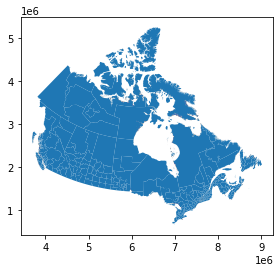

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas &> /dev/null
import os
import pandas as pd
import pickle
import geopandas as gpd

os.chdir('/content/drive/MyDrive/shared/ssc22-case-comp/dataset/')
print(os.getcwd())

# Load the CD boundary data

b_path = './canada-census-division/canada-census-division.shp' 
b_data = gpd.read_file(b_path)
b_data.plot()

Merge the boundary data's geometry column with the CD data obtained by using Daisy's modules

In [ ]:
b_data.head(5)

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry
0,4621,Division No. 21,CDR,46,Manitoba,"POLYGON ((5753862.131 2114062.380, 5752944.009..."
1,4622,Division No. 22,CDR,46,Manitoba,"POLYGON ((6204057.683 2107140.734, 6204737.266..."
2,4623,Division No. 23,CDR,46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
3,4701,Division No. 1,CDR,47,Saskatchewan,"POLYGON ((5422081.934 1612417.386, 5422521.154..."
4,4702,Division No. 2,CDR,47,Saskatchewan,"POLYGON ((5270212.334 1641442.671, 5270216.591..."


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/shared/ssc22-case-comp/sonny_dir/')

from Exploratory_Data_Analysis import makeData, dataAggregation

In [ ]:
# Load original data

can_path = './python_canada-speed-data.p'
with open(can_path, 'rb') as file:
    canada = pickle.load(file)
print(canada.columns)
canada.head(5)

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME',
       'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS',
       'geometry'],
      dtype='object')


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0023331133131332,11910,1408,27,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4593360.869 4089469.904, 4593533.055..."
1,0023331133133011,14969,1554,25,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4592705.709 4089714.238, 4592877.874..."
2,0032202103303220,5038,1317,54,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010054,8,330.0,None,None,None,None,"POLYGON ((4736491.486 4146142.702, 4736658.777..."
3,0032220031120102,13419,6169,50,4,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,None,None,None,None,"POLYGON ((4642710.684 4070147.116, 4642884.538..."
4,0032220031120103,13587,1095,28,2,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,0388,Inuvik,4,2,"POLYGON ((4642884.538 4070012.633, 4643058.404..."


In [ ]:
# Group data by CDUID for the download speed
cd_data = makeData(canada, 'CDUID', True, 'avg_d_mbps')
cd_data.head()

conn_type       fixed                                                \
Date          2019-Q1    2019-Q2    2019-Q3     2019-Q4     2020-Q1   
CDUID                                                                 
1001       105.295340  91.410793  96.046779  112.561823  120.186594   
1002        79.625580  68.724396  59.541467   69.354051   81.566066   
1003        11.280463  26.296083  25.246722   18.129528   31.299013   
1004        53.605476  53.389824  97.695987   82.129551  104.686174   
1005        78.619469  70.456881  55.076201   71.562194   60.834764   

conn_type                                                              ...  \
Date          2020-Q2     2020-Q3     2020-Q4     2021-Q1     2021-Q2  ...   
CDUID                                                                  ...   
1001       101.915818  104.580401  126.002951  133.130696  147.649822  ...   
1002       104.129278   76.298396   74.229136  101.383995  146.691068  ...   
1003        43.492070   39.293772   55.586625   28.950682   38.144149  ...   
1004        77.688376   90.854841   96.260326  115.204244  126.553590  ...   
1005        64.999351   82.039146   69.659892   98.493189  108.290090  ...   

conn_type     mobile                                                           \
Date         2020-Q1    2020-Q2    2020-Q3    2020-Q4     2021-Q1     2021-Q2   
CDUID                                                                           
1001       63.628410  36.171911  65.754633  45.314982   64.860869  116.903946   
1002       34.148750  48.570063  63.522550  61.863967  103.775200   44.908632   
1003       28.961071  48.083500  74.280852  13.773000   16.150750   96.758000   
1004       39.975000  51.649273  16.116143  29.425500   53.886500   96.810500   
1005       62.516200  29.594300  30.623596   7.852275   31.894778   22.495250   

conn_type                         tests     DA_POP  
Date         2021-Q3     2021-Q4                    
CDUID                                               
1001       61.880934  102.590156  38982  5567245.0  
1002       30.687475   64.163200  10903   700260.0  
1003       74.946800   78.664143   5269   533740.0  
1004       46.341667   38.750929   6457   680910.0  
1005       49.495833   49.642700   6350   905465.0  

[5 rows x 26 columns]

In [ ]:
# pull only conn_type=fixed
fixed_data = cd_data.loc[:,(['fixed', 'tests', 'DA_POP'])]
fixed_data = fixed_data.reset_index()
fixed_data = fixed_data.droplevel(level=0, axis=1)
fixed_data.columns = ['CDUID', '2019-Q1',	'2019-Q2','2019-Q3', '2019-Q4','2020-Q1',	'2020-Q2',	'2020-Q3',	'2020-Q4',	'2021-Q1',	'2021-Q2',	'2021-Q3',	'2021-Q4', 'tests','DA_POP']
fixed_data.head()

,CDUID,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,tests,DA_POP
0,1001,105.295340,91.410793,96.046779,112.561823,120.186594,101.915818,104.580401,126.002951,133.130696,147.649822,141.691867,149.276017,38982,5567245.0
1,1002,79.625580,68.724396,59.541467,69.354051,81.566066,104.129278,76.298396,74.229136,101.383995,146.691068,136.602958,192.814007,10903,700260.0
2,1003,11.280463,26.296083,25.246722,18.129528,31.299013,43.492070,39.293772,55.586625,28.950682,38.144149,33.918313,73.922878,5269,533740.0
3,1004,53.605476,53.389824,97.695987,82.129551,104.686174,77.688376,90.854841,96.260326,115.204244,126.553590,194.281503,136.835246,6457,680910.0
4,1005,78.619469,70.456881,55.076201,71.562194,60.834764,64.999351,82.039146,69.659892,98.493189,108.290090,146.476885,126.392904,6350,905465.0


In [ ]:
# Merge with the boundary data

merged_data = b_data.merge(fixed_data, on='CDUID', how='left')
print(merged_data.shape)
print(merged_data.columns)
merged_data.head(5)

(293, 20)
Index(['CDUID', 'CDNAME', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry', '2019-Q1',
       '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3',
       '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', 'tests',
       'DA_POP'],
      dtype='object')


,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,2019-Q1,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,tests,DA_POP
0,4621,Division No. 21,CDR,46,Manitoba,"POLYGON ((5753862.131 2114062.380, 5752944.009...",10.969708,11.504049,12.178585,11.598048,31.078093,17.680161,32.997536,39.577115,36.638628,68.453336,62.776182,95.403728,9685,1053890.0
1,4622,Division No. 22,CDR,46,Manitoba,"POLYGON ((6204057.683 2107140.734, 6204737.266...",42.902977,31.102748,31.654955,63.713872,22.245280,25.696649,30.131834,37.165333,66.576610,86.906071,102.148346,97.025587,4389,1096785.0
2,4623,Division No. 23,CDR,46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",7.367737,8.154834,10.676788,10.329840,18.924137,11.283153,59.781785,69.834849,59.428820,77.856268,93.372450,97.945121,3235,266635.0
3,4701,Division No. 1,CDR,47,Saskatchewan,"POLYGON ((5422081.934 1612417.386, 5422521.154...",14.791119,14.680140,19.249345,23.091277,21.493342,18.430462,16.796906,21.772634,22.333091,49.550688,79.115720,67.320231,17296,1741640.0
4,4702,Division No. 2,CDR,47,Saskatchewan,"POLYGON ((5270212.334 1641442.671, 5270216.591...",16.695685,20.033315,21.169976,23.188939,23.552589,21.423277,24.913625,23.100039,21.547493,31.417196,51.642854,50.141588,11089,1076270.0


In [ ]:
# save the merged data

merged_data.to_file('./canada-census-division/CD-download-data.shp')

## CD download data (no external data involved)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas rtree &> /dev/null # install necessary packages 

import geopandas as gpd
import pandas as pd
import rtree
import os
import pickle

print(os.getcwd())


os.chdir('/content/drive/MyDrive/shared/ssc22-case-comp/dataset/')
print(os.getcwd())

import sys
sys.path.append('/content/drive/MyDrive/shared/ssc22-case-comp/sonny_dir/')

from Exploratory_Data_Analysis import makeData, dataAggregation # import Daisy's module

# Load original data
can_path = './python_canada-speed-data.p'
with open(can_path, 'rb') as file:
    canada = pickle.load(file)
print(canada.columns)
canada.head(5)

# Create a boundary data using gpd.dissolve()
sub_data = canada[['CDUID', 'geometry']]
dissolved_data = sub_data.dissolve(by='CDUID')
dissolved_data.to_file('./canada-census-division/custom-CDUID-boundary.shp')

# load the previously merged data from the above
temp_data = gpd.read_file('./canada-census-division/CD-download-data.shp')
# temp_data.head(5)

temp_data2 = temp_data.drop(columns = 'geometry').merge(dissolved_data, on='CDUID', how='left')
# temp_data2.head()

# save data
temp_data2.to_file('./canada-census-division/CD-download-custom-boundary.shp')

/content/drive/MyDrive/shared/dataset
Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME',
       'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS',
       'geometry'],
      dtype='object')


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0023331133131332,11910,1408,27,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4593360.869 4089469.904, 4593533.055..."
1,0023331133133011,14969,1554,25,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010033,8,590.0,None,None,None,None,"POLYGON ((4592705.709 4089714.238, 4592877.874..."
2,0032202103303220,5038,1317,54,1,1,2019,Q1,fixed,61,...,6101,Region 1,61010054,8,330.0,None,None,None,None,"POLYGON ((4736491.486 4146142.702, 4736658.777..."
3,0032220031120102,13419,6169,50,4,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,None,None,None,None,"POLYGON ((4642710.684 4070147.116, 4642884.538..."
4,0032220031120103,13587,1095,28,2,1,2019,Q1,fixed,61,...,6101,Region 1,61010045,8,275.0,0388,Inuvik,4,2,"POLYGON ((4642884.538 4070012.633, 4643058.404..."


## Smoothing by the dissemination area

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install geopandas rtree &> /dev/null # install necessary packages 

import geopandas as gpd
import pandas as pd
import rtree
import os
import pickle

print(os.getcwd())

# Load original data
can_path = './python_canada-speed-data.p'
with open(can_path, 'rb') as file:
    canada = pickle.load(file)
# print(canada.columns)
# canada.head(5)

# Load the DA boundary data
b_path = './canada-da-boundaries/canada-da.shp' 
b_data = gpd.read_file(b_path)
# b_data.plot()

# Group data by DAUID for the download speed
cd_data = makeData(canada, 'DAUID', True, 'avg_d_mbps')
# cd_data.head()

# pull only conn_type=fixed
fixed_data = cd_data.loc[:,(['fixed', 'tests', 'DA_POP'])]
fixed_data = fixed_data.reset_index()
fixed_data = fixed_data.droplevel(level=0, axis=1)
fixed_data.columns = ['DAUID', '2019-Q1', '2019-Q2','2019-Q3', '2019-Q4','2020-Q1',	'2020-Q2',	'2020-Q3',	'2020-Q4',	'2021-Q1',	'2021-Q2',	'2021-Q3',	'2021-Q4', 'tests','DA_POP']
# fixed_data.head()

# Merge with the boundary data
merged_data = b_data.merge(fixed_data, on='DAUID', how='left')
print(merged_data.shape)
print(merged_data.columns)
merged_data.head(5)

# save the merged data
merged_data.to_file('./canada-da-boundaries/DA-download-data.shp')
print('done!')

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME',
       'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS',
       'geometry'],
      dtype='object')
(56589, 37)
Index(['DAUID', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME', 'CDTYPE', 'CCSUID',
       'CCSNAME', 'CSDUID', 'CSDNAME', 'CSDTYPE', 'ERUID', 'ERNAME', 'SACCODE',
       'SACTYPE', 'CMAUID', 'CMAPUID', 'CMANAME', 'CMATYPE', 'CTUID', 'CTNAME',
       'ADAUID', 'geometry', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4',
       '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2',
       '2021-Q3', '2021-Q4', 'tests', 'DA_POP'],
      dtype='object')


## Load other external data

In [ ]:
os.chdir('/content/drive/MyDrive/shared/ssc22-case-comp/dataset/')
!ls

 Alberta		    'Newfoundland and Labrador'
'British Columbia'	    'Northwest Territories'
 canada-census-division     'Nova Scotia'
 canada-census-subdivision   Nunavut
 canada-da-boundaries	     Ontario
 canvec_15M_CA_Admin_shp    'Prince Edward Island'
 canvec_1M_CA_Admin_shp      python_canada-speed-data.p
 canvec_50K_CA_ManMade_shp   Quebec
 canvec_50K_CA_Res_MGT	     Saskatchewan
 Manitoba		     Yukon
'New Brunswick'


In [ ]:
os.chdir('./canvec_50K_CA_ManMade_shp/')
!ls

FileNotFoundError: ignored

In [ ]:
os.chdir('./canvec_50K_CA_ManMade')
!ls

building_0_10.cpg		   dam_2.cpg
building_0_10.dbf		   dam_2.dbf
building_0_10.prj		   dam_2.prj
building_0_10.sbn		   dam_2.sbn
building_0_10.sbx		   dam_2.sbx
building_0_10.shp		   dam_2.shp
building_0_10.shx		   dam_2.shx
building_0_11.cpg		   delimiting_structure_1.cpg
building_0_11.dbf		   delimiting_structure_1.dbf
building_0_11.prj		   delimiting_structure_1.prj
building_0_11.sbn		   delimiting_structure_1.sbn
building_0_11.sbx		   delimiting_structure_1.sbx
building_0_11.shp		   delimiting_structure_1.shp
building_0_11.shx		   delimiting_structure_1.shx
building_0_12.cpg		   landmark_feature_0.cpg
building_0_12.dbf		   landmark_feature_0.dbf
building_0_12.prj		   landmark_feature_0.prj
building_0_12.sbn		   landmark_feature_0.sbn
building_0_12.sbx		   landmark_feature_0.sbx
building_0_12.shp		   landmark_feature_0.shp
building_0_12.shx		   landmark_feature_0.shx
building_0_13.cpg		   landmark_feature_1.cpg
building_0_13.dbf		   landmark_feature_1.dbf
building_0_13.prj		   landma

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23765 entries, 0 to 23764
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   feature_id  23765 non-null  object  
 1   datemin     23765 non-null  object  
 2   datemax     23765 non-null  object  
 3   haccmin     23765 non-null  float64 
 4   haccmax     23765 non-null  float64 
 5   lidsc       23765 non-null  int64   
 6   lidsc_en    23765 non-null  object  
 7   lidsc_fr    23765 non-null  object  
 8   tkconfig    23765 non-null  int64   
 9   tkconfigen  23765 non-null  object  
 10  tkconfigfr  23765 non-null  object  
 11  ori         1041 non-null   float64 
 12  ori_u       23765 non-null  int64   
 13  ori_u_en    23765 non-null  object  
 14  ori_u_fr    23765 non-null  object  
 15  ori_usym    23765 non-null  int64   
 16  oriusymen   23765 non-null  object  
 17  oriusymfr   23765 non-null  object  
 18  map_sel     23765 non-null  int64   
 

,feature_id,datemin,datemax,haccmin,haccmax,lidsc,lidsc_en,lidsc_fr,tkconfig,tkconfigen,...,ori_u,ori_u_en,ori_u_fr,ori_usym,oriusymen,oriusymfr,map_sel,map_sel_en,map_sel_fr,geometry
0,926af0e92dea4b95b207f18c99216354,1975,1975,18.0,18.0,20,Not Identified,Non identifié,595,Vertical,...,414,Degree,Degré,388,deg,deg,71,Dense,Dense,POINT (-112.77304 49.87618)
1,3e0cce25cee64ad99a27957b515c9046,1975,1975,18.0,18.0,20,Not Identified,Non identifié,595,Vertical,...,414,Degree,Degré,388,deg,deg,71,Dense,Dense,POINT (-112.68611 49.93034)
2,b835d487261741c0baa102dcd89dd917,1975,1975,18.0,18.0,20,Not Identified,Non identifié,595,Vertical,...,414,Degree,Degré,388,deg,deg,71,Dense,Dense,POINT (-112.52784 49.96620)
3,31eb08e2ff7d49f28e7a99b7b456971e,1975,1975,18.0,18.0,20,Not Identified,Non identifié,595,Vertical,...,414,Degree,Degré,388,deg,deg,71,Dense,Dense,POINT (-112.96263 49.90677)
4,aa1d2cb14f35423ab6810ad07e6081eb,1975,1975,18.0,18.0,20,Not Identified,Non identifié,595,Vertical,...,414,Degree,Degré,388,deg,deg,71,Dense,Dense,POINT (-112.77585 49.87953)


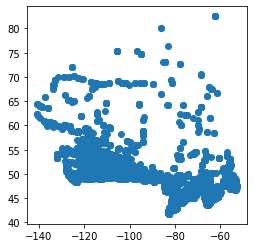

In [ ]:
canvec = gpd.read_file('./tank_0.shp')
canvec.plot()
canvec.info()
canvec.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   feature_id  3323 non-null   object  
 1   datemin     3323 non-null   object  
 2   datemax     3323 non-null   object  
 3   haccmin     3323 non-null   float64 
 4   haccmax     3323 non-null   float64 
 5   dsc         3323 non-null   int64   
 6   dsc_en      3323 non-null   object  
 7   dsc_fr      3323 non-null   object  
 8   map_sel     3323 non-null   int64   
 9   map_sel_en  3323 non-null   object  
 10  map_sel_fr  3323 non-null   object  
 11  geometry    3323 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(7)
memory usage: 311.7+ KB


,feature_id,datemin,datemax,haccmin,haccmax,dsc,dsc_en,dsc_fr,map_sel,map_sel_en,map_sel_fr,geometry
0,983df02b1c3947ae95c8631d5d42b1cb,1990,1990,22.0,22.0,677,Cemetery,Cimetière,71,Dense,Dense,POINT (-99.05615 50.56180)
1,30d7f5a3e6484736a7322399ae500a4d,2001,2001,25.0,25.0,677,Cemetery,Cimetière,71,Dense,Dense,POINT (-134.68411 60.57620)
2,b3f3758b0c04401d811e7ef08a2b5056,1989,1989,26.0,26.0,677,Cemetery,Cimetière,71,Dense,Dense,POINT (-76.98768 44.99107)
3,c99addd4a6ee4b5f83afda6be5bd800b,1989,1989,26.0,26.0,677,Cemetery,Cimetière,71,Dense,Dense,POINT (-76.68804 44.90127)
4,d042d38f7f5440c584b63dc7f13f6dbe,1989,1989,26.0,26.0,677,Cemetery,Cimetière,71,Dense,Dense,POINT (-76.52840 44.96081)


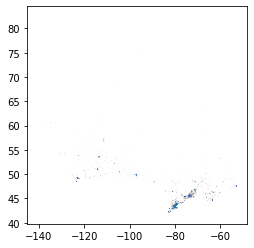

In [ ]:
canvec.plot()

In [ ]:
canvec['datemax'].unique()

array(['1994', '1979', '1989', '1985', '1981', '1967', '1993', '1987',
       '1976', '1957', '1975', '1986', '1972', '1990', '1977', '1983',
       '1973', '1995', '1992', '1988', '1982', '1984', '1991', '1978',
       '1974', '1954', '1980', '1971', '1955', '195308', '1965', '1996',
       '1968', '1951', '1970', '1962', '1958', '1947', '1952', '1956',
       '1948', '199512', '1959', '198603', '1969', '1950', '1964', '1953',
       '1999', '198407', '1963', '2015', '198906', '197702', '1960',
       '1966', '198607', '1949'], dtype=object)